In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import io

# mount google drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sounding_Spirit/dimension2total_scoring.csv')
df["ssdl:scoringSummary"]=df["ssdl:scoringSummary"].astype(str)
df["ssdl:totalScoring"]=df["ssdl:totalScoring"].astype(str)
df["ssdl:dimensions"]=df["ssdl:dimensions"].astype(str)
df

,ssdl:pid,ssdl:scoringSummary,ssdl:totalScoring,ssdl:dimensions
0,1850-Missou-EMU,"V (4), Coro, org (pf)",Treble (2)\nT\nB\nCoro: S\nCoro: A\nCoro: T\nC...,14.5 x 23.5 cm
1,1850-Missou-EMU,"V (4), Coro, org (pf)",Treble (2)\nT\nB\nCoro: S\nCoro: A\nCoro: T\nC...,14.5 x 23.5 cm
2,1852-Collec-EMU,Nil,Nil,12.5 x 7.5 cm
3,1852-Peters-EMU,"V (4), Coro, org",S (2)\nA\nT\nB\nCoro: S (2)\nCoro: T\nCoro: B\...,25 x 18 cm
4,1852-Reviva-EMU,Nil,Nil,11.5 x 6.5 cm
...,...,...,...,...
1294,1859-Narrat-UMI,nan,nan,nan
1295,1891-Otterb-UMI,nan,nan,nan
1296,1882-Songsf-UMI,nan,nan,17 x 24 cm
1297,1879-Gospel-UMI,nan,nan,20 x 13 cm


1884-Everla-EMU is corrupted: Hymns, English;African Methodist Episcopal Church--Hymns;Choruses, sacred (mixed voices), unaccompanied;Choruses, sacred (unison) with keyboard;Anthems;Chants;Gospel music;Hymnals;Funeral hymns;Church music--African Methodist Episcopal Church;Sunday school music;Prayer meetings--Songs and music;African Americans--Music;Christmas hymns;Juneteenth--Songs and music;Reedy Chapel A.M.E. Church (Galveston, Tex.);Musical instruments--Advertising;Music in African American universities and colleges;American Antiquarian Society--Provenance;Hartford Theological Seminary--Provenance;African Americans--Music
1884-Everla-EMU is corrupted: Hymns, English;African Methodist Episcopal Church--Hymns;Choruses, sacred (mixed voices), unaccompanied;Choruses, sacred (unison) with keyboard;Anthems;Chants;Gospel music;Hymnals;Funeral hymns;Church music--African Methodist Episcopal Church;Sunday school music;Prayer meetings--Songs and music;African Americans--Music;Christmas hymns;

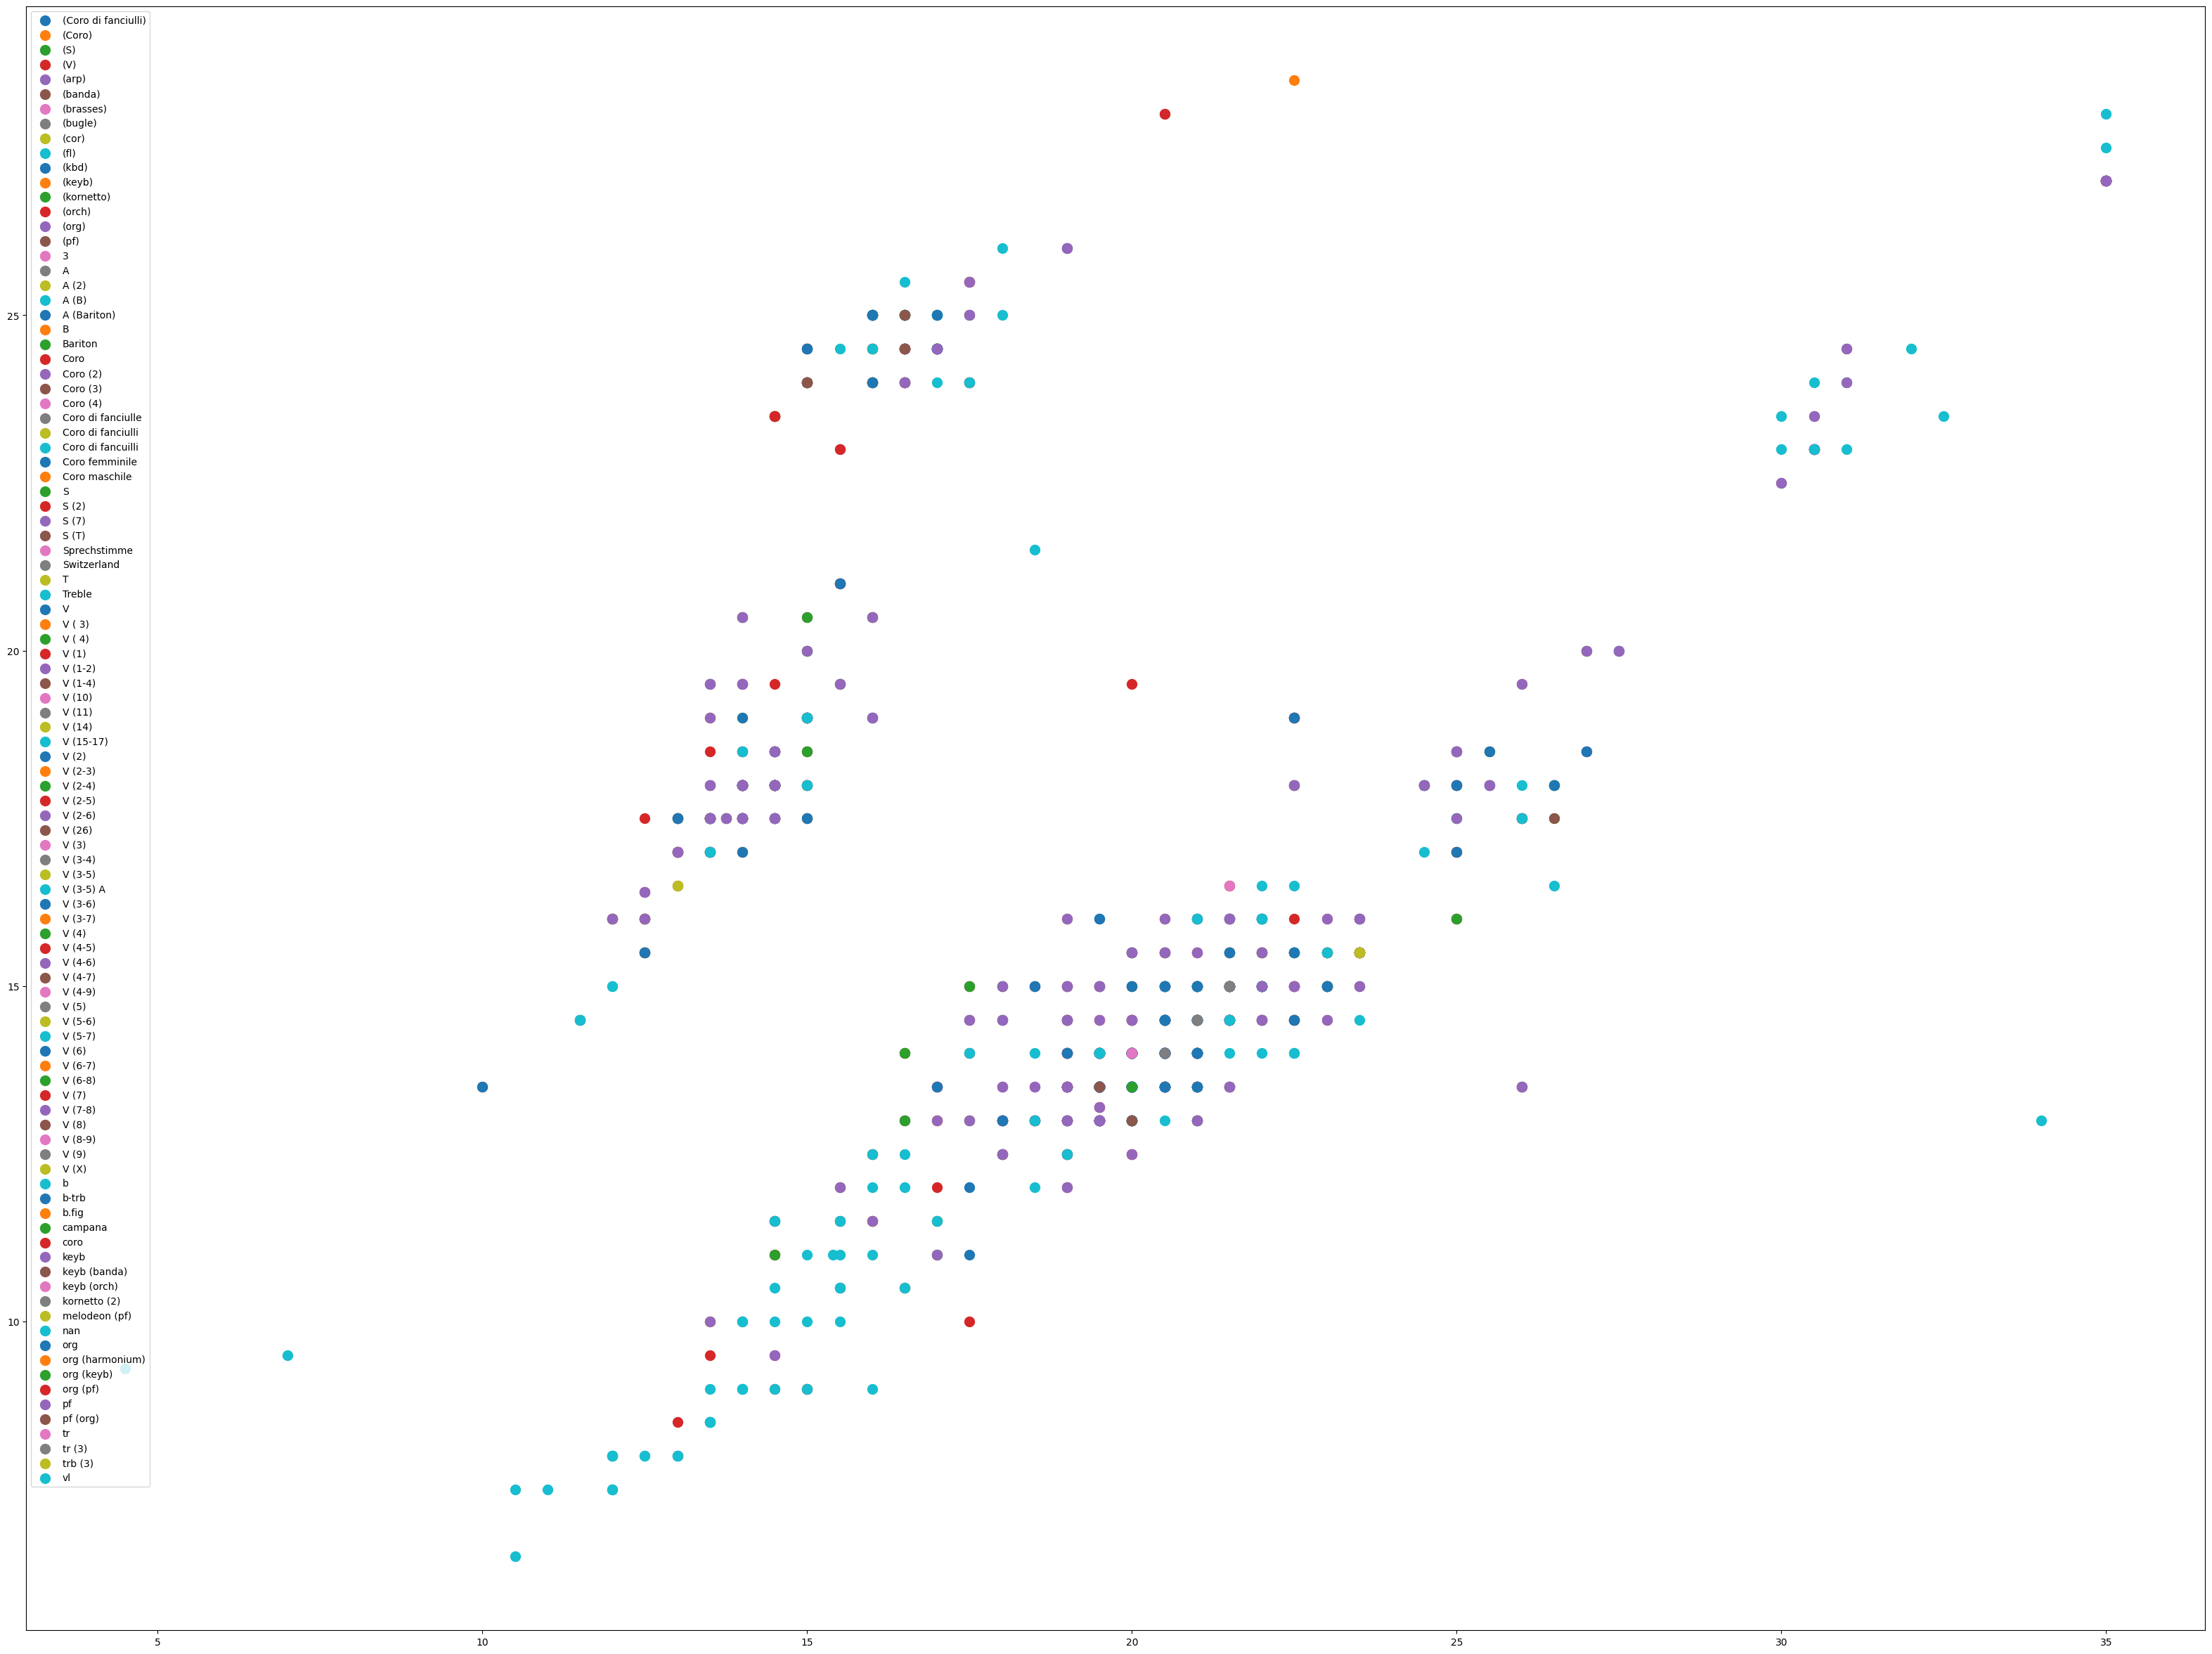

In [ ]:
# plot width vs height and mark dots based on scoring summary
summary = []
summaryW = {}
summaryH = {}

for x in df.index:
  sum = df.loc[x,"ssdl:scoringSummary"]
  d = df.loc[x,"ssdl:dimensions"]
  if sum == "Nil" or sum == "Nan" or d == "nan":
    continue
  for s in sum.split(", "):
    if s not in summary:
      summary.append(s)
      summaryW[s]=[]
      summaryH[s]=[]
    try:
      summaryW[s].append(float(d.split(" x ")[0]))
      summaryH[s].append(float(d.split(" x ")[1].split(" cm")[0]))
    except:
      print(df.loc[x,"ssdl:pid"],"is corrupted:",d)

plt.figure(figsize=(40,30))
summary=sorted(summary)
for s in summary:
  plt.scatter(summaryW[s],summaryH[s], s=100,label=s)
plt.legend()
plt.savefig("dimension2scoring_summary.png")
plt.show()



Corrupted item:
https://omeka.soundingspirit.org/s/ssdl/item/178<br>


1884-Everla-EMU is corrupted: Hymns, English;African Methodist Episcopal Church--Hymns;Choruses, sacred (mixed voices), unaccompanied;Choruses, sacred (unison) with keyboard;Anthems;Chants;Gospel music;Hymnals;Funeral hymns;Church music--African Methodist Episcopal Church;Sunday school music;Prayer meetings--Songs and music;African Americans--Music;Christmas hymns;Juneteenth--Songs and music;Reedy Chapel A.M.E. Church (Galveston, Tex.);Musical instruments--Advertising;Music in African American universities and colleges;American Antiquarian Society--Provenance;Hartford Theological Seminary--Provenance;African Americans--Music
1884-Everla-EMU is corrupted: Hymns, English;African Methodist Episcopal Church--Hymns;Choruses, sacred (mixed voices), unaccompanied;Choruses, sacred (unison) with keyboard;Anthems;Chants;Gospel music;Hymnals;Funeral hymns;Church music--African Methodist Episcopal Church;Sunday school music;Prayer meetings--Songs and music;African Americans--Music;Christmas hymns;

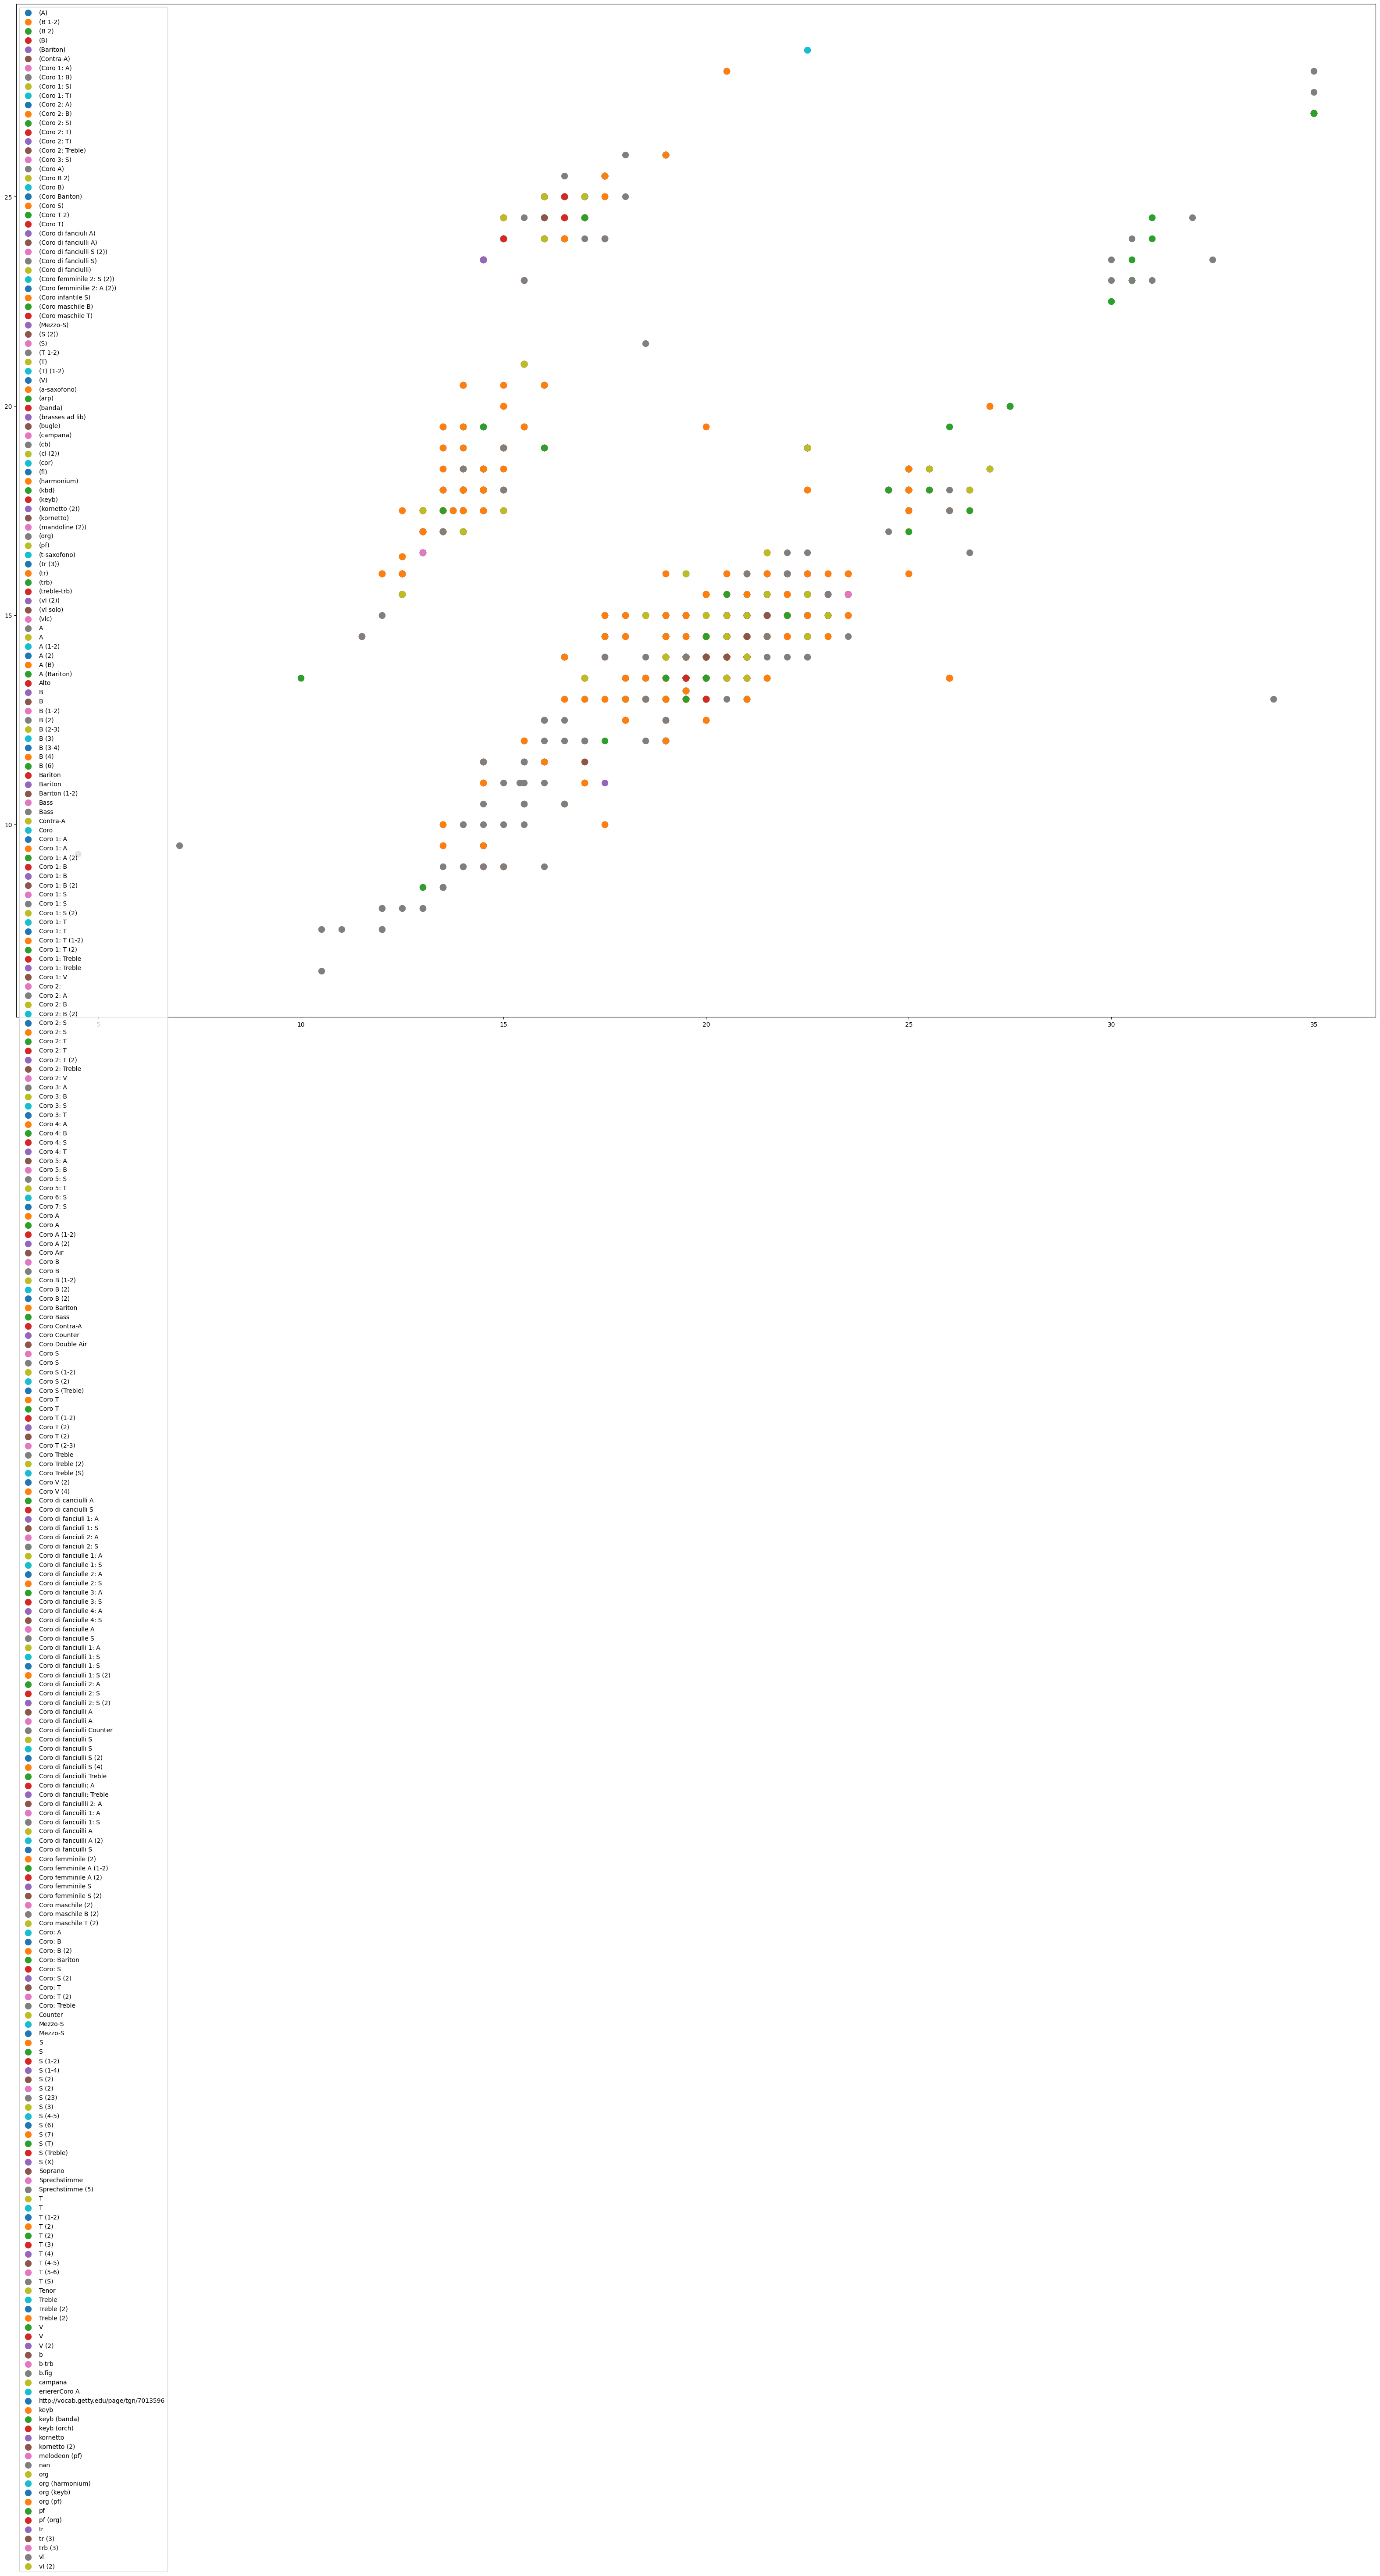

In [ ]:
# plot width vs height and mark dots based on total scoring

total = []
totalW = {}
totalH = {}

for x in df.index:
  sum = df.loc[x,"ssdl:totalScoring"]
  d = df.loc[x,"ssdl:dimensions"]
  if sum == "Nil" or sum == "Nan" or d == "nan":
    continue
  for s in sum.split("\n"):
    if s not in total:
      total.append(s)
      totalW[s]=[]
      totalH[s]=[]
    try:
      totalW[s].append(float(d.split(" x ")[0]))
      totalH[s].append(float(d.split(" x ")[1].split(" cm")[0]))
    except:
      print(df.loc[x,"ssdl:pid"],"is corrupted:",d)

plt.figure(figsize=(40,30))
total=sorted(total)
for s in total:
  plt.scatter(totalW[s],totalH[s], s=100,label=s)
plt.legend()
plt.savefig("dimension2total_scoring.png")
plt.show()

